### Проверка гипотез. А/В-тестирование

1. На любом языке программирования написать программу, реализующую разобранные на занятии критерии проверки гипотез о равенстве вероятностей и средних значений. В качестве ответа программа должна возвращать - значение статистики критерия, ответ на вопрос принимается или отвергается основная гипотеза на выбранном уровне значимости, Р-значение. Ссылку на код на гитхабе прислать в чат с преподавателем.

In [624]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm
import pandas as pd

In [625]:
data_norm =np.random.normal(0, 1, 100000)

In [626]:
alpha = 0.05

In [627]:
def get_quantile(data=[], alpha=0.05):
    """Функция принимает на вход массив c распределением N(0;1), 
    параметр - уровень значимости (alpha) 
    и возвращает значение квантиля уровня alpha для 
    нормального стандартного распределения N(0;1)
    """
    if data == []:
        data = np.random.normal(0, 1, 1000000)
        return np.quantile(data, alpha, axis = None)
    else:
        return np.quantile(data, alpha, axis = None)

In [628]:
# проверка
get_quantile(data=data_norm, alpha=alpha)

-1.656718433604984

In [629]:
def get_AB_matrix(A_success, A_fail, B_success, B_fail):
    """Функция принимает на вход
    A_succes - число успехов при варианте А
    A_fail - число неудач при варианте А
    B_success - число успехов при варианте В
    B_fail - число неудач при варианте В
    и возвращает матрицу numpy размера 3*3 вида
    array([[  46., 1054., 1100.],
           [  30.,  970., 1000.],
           [  76., 2024., 2100.]])
    """
    matrix = np.zeros( (3, 3) )
    matrix[0,0] = A_success
    matrix[0,1] = A_fail
    matrix[1,0] = B_success
    matrix[1,1] = B_fail
    matrix[2,0] = matrix[0,0] + matrix[1,0]
    matrix[2,1] = matrix[0,1] + matrix[1,1]
    matrix[0,2] = matrix[0,0] + matrix[0,1]
    matrix[1,2] = matrix[1,0] + matrix[1,1]
    matrix[2,2] = matrix[0,2] + matrix[1,2]
    
    return matrix

In [630]:
# проверка
get_AB_matrix(46, 1054, 30, 970)

array([[  46., 1054., 1100.],
       [  30.,  970., 1000.],
       [  76., 2024., 2100.]])

In [631]:
def get_T(matrix):
    """Функция принимает матрицу с результатами опыта вида
    array([[  46., 1054., 1100.],
       [  30.,  970., 1000.],
       [  76., 2024., 2100.]])
       и возвращает значение статистики критерия (Т)
    """
    numerator = (matrix[0,0]/matrix[0,2]) - (matrix[1,0]/matrix[1,2])
    denominator = np.sqrt((matrix[2,0]/matrix[2,2])*
                          (1-matrix[2,0]/matrix[2,2])*
                          (1/matrix[0,2] + 1/matrix[1,2]))
    return numerator/denominator

In [632]:
# проверка
get_T(get_AB_matrix(46, 1054, 30, 970))

1.4482535671508665

In [633]:
def p_value(T):
    """Функция принимает аргумент float - 
    статистику критерия (Т)
    и возвращает p-value"""
    return 1 - norm.cdf(T, loc=0, scale=1)

In [634]:
#проверка
p_value(1.46)

0.0721450369658938

In [635]:
def initial_arr(array_x, array_y):
    """Функция принимает на вход 2 массива с измерениями
    вида array([[ 3,  7,  2, 80]]), 
    присваивает первому массиву метку 0 во втором столбце,
    а второму массиву - метку 1, 
    затем ранжирует по возрастанию значения измерения
    и возвращает матрицу вида
    array([[ 1.,  1.],
            [ 2.,  0.],
            [ 3.,  0.],
            [ 3.,  1.],
            [ 6.,  1.],
            [ 7.,  0.],
            [ 9.,  1.],
            [80.,  0.]])
    """
    array_x = array_x.reshape(array_x.shape[1], 1)
    array_x = np.hstack((array_x,np.zeros(array_x.shape)))
    array_y = array_y.reshape(array_y.shape[1], 1)
    array_y = np.hstack((array_y,np.ones(array_y.shape)))
    full_array = np.vstack((array_x,array_y))
    
    return np.array(sorted(map(tuple, full_array)))


In [636]:
# проверка
a = np.array([[3, 7, 2, 80]])
b = np.array([[9, 1, 3, 6]])
initial_arr(a,b)

array([[ 1.,  1.],
       [ 2.,  0.],
       [ 3.,  0.],
       [ 3.,  1.],
       [ 6.,  1.],
       [ 7.,  0.],
       [ 9.,  1.],
       [80.,  0.]])

In [637]:
def rang_maker(array):
    """Функция принимает массив вида 
    array([[ 1.,  1.],
           [ 2.,  0.],
           [ 3.,  0.],
           [ 3.,  1.],
           [ 6.,  1.],
           [ 7.,  0.],
           [ 9.,  1.],
           [80.,  0.]])
       от функции initial_arr() 
       и возвращает такой же массив, но с дополнительным
       столбцом с рангом.
       При этом для повторяющихся значений ранг высчитывается как средний.
       Например:
       array([[ 1. ,  1. ,  1. ],
           [ 2. ,  0. ,  2. ],
           [ 3. ,  0. ,  3.5],
           [ 3. ,  1. ,  3.5],
           [ 6. ,  1. ,  5. ],
           [ 7. ,  0. ,  6. ],
           [ 9. ,  1. ,  7. ],
           [80. ,  0. ,  8. ]])
       """
    rangs = np.arange(1, array.shape[0]+1)[:, np.newaxis]
    array = np.hstack((array, rangs))
    
    for i in array[:,0]:
        if array[:, 0][array[:, 0] == i ].shape[0] > 1:
            array[:,2][array[:, 0] == i ] = np.mean(array[:,2][ array[:, 0] == i ])
        
    return array

In [638]:
# проверка
array = rang_maker(initial_arr(a,b))
array

array([[ 1. ,  1. ,  1. ],
       [ 2. ,  0. ,  2. ],
       [ 3. ,  0. ,  3.5],
       [ 3. ,  1. ,  3.5],
       [ 6. ,  1. ,  5. ],
       [ 7. ,  0. ,  6. ],
       [ 9. ,  1. ,  7. ],
       [80. ,  0. ,  8. ]])

In [639]:
def results(array):
    """Функция принимает на вход 
    матрицу с расставленными рангами
    и возвращает для игреков значения в виде списка:
    W_eval -статистика критерия 
    M - мат. ожидание
    D - дисперсия
    W - суммма рангов
    """
    W = np.sum(array[:,2][array[:, 1] == 1 ])
    n = array[array[:, 1] == 1 ].shape[0]
    m = array[array[:, 1] == 0 ].shape[0]
    M = (n/2)*(m+n+1)
    D = (m*n/12)*(m+n+1)
    W_eval = (W - M)/np.sqrt(D)
        
    return [W_eval, M, D, W]

In [640]:
# проверка
results(array)

[-0.43301270189221935, 18.0, 12.0, 16.5]

In [641]:
def crit_conf_reg_plot(crit_stat = 0, alpha=0.05, Ha_type='inequality'):
    """Функция отрисовывает критическую(-ие) область (-и)
    и положение статистики критерия.
    Необходимо задать тип неравенства в гипотезе:
    'inequality' - не равно
    'bigger' - больше
    'less' - меньше.
    По умолчанию значеине сатистики критерия (crit_stat) равно 0,
    уровня значимости (alpha) равно 0,05
    """
    x = np.linspace(-5, 5, 2000)
    y = np.zeros((2000))
    data = np.random.normal(0, 1, 1000000)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x,y, c = 'red')
    plt.scatter(crit_stat, 0, color='green')
    style = dict(size=10, color='gray')

    plt.text(crit_stat, 0, 'T\n', **style)
    if Ha_type == 'inequality':
        start = np.quantile(data, alpha/2, axis = None)
        end = np.quantile(data, 1-alpha/2, axis = None)
        plt.scatter([start, end], [0,0], color='black')
        plt.text(start, 0, 't 1/2 alpha\n', **style)
        plt.text(end, 0, 't 1-1/2 alpha\n', **style)
        plt.plot(np.linspace(start, end, 100), np.zeros((100)), color='blue')
    elif Ha_type == 'bigger':
        start = x[0]
        end = np.quantile(data, 1-alpha, axis = None)
        plt.scatter([end], [0], color='black')
        plt.text(end, 0, 't 1-alpha\n', **style)
        plt.plot(np.linspace(start, end, 100), np.zeros((100)), color='blue')
    elif Ha_type == 'less':
        start = np.quantile(data, alpha, axis = None)
        end = x[-1]
        plt.scatter([start], [0], color='black')
        plt.text(start, 0, 't alpha\n', **style)
        plt.plot(np.linspace(start, end, 100), np.zeros((100)), color='blue')
    plt.show()

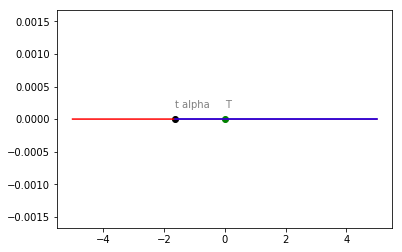

In [642]:
# проверка
crit_conf_reg_plot(Ha_type='less')

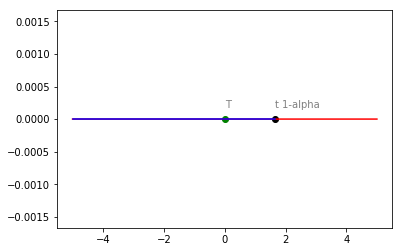

In [643]:
# проверка
crit_conf_reg_plot(Ha_type='bigger')

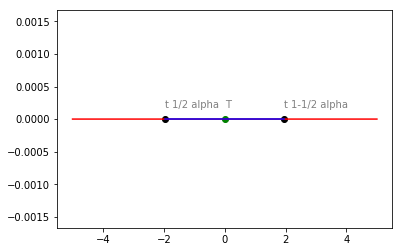

In [644]:
# проверка
crit_conf_reg_plot(Ha_type='inequality')

2. С помощью написанной программы решить четыре задачи. Ответы задач прислать в чат с преподавателем. Условия задач: https://drive.google.com/open?id=11JjbSSbswtrfCxwh4xla_Q7aj_KfWXqC

### Задача 1. 

Перед президентскими выборами  в городах Курске и Владивостоке был проведен социологический опрос. Каждый респондент должен был ответить на вопрос: «За какого кандидата вы будете голосовать на выборах?». В Курске опросили 105 человек, из них 42 ответили, что будут голосовать за кандидата А, во Владивостоке опросили 195 человек, из которых 65 за А. Можно ли считать на уровне значимости 0,05, что уровни поддержки кандидата А в Курске и Владивостоке одинаковы?

##### Шаг 0. Строим модель.

p1 - вероятность голоса за кандидата в Курске (уровень поддержки в Курске)

p2 - вероятность голоса за кандидата во Владивостоке (уровень поддержки во Владивостоке)

In [645]:
matrix_1 = get_AB_matrix(A_success=42, A_fail=105-42, B_success=65, B_fail=195-65)
matrix_1

array([[ 42.,  63., 105.],
       [ 65., 130., 195.],
       [107., 193., 300.]])

##### Шаг 1. Формулируем гипотезы.

H0: p1=p2
    
Ha: p1<p2

##### Шаг 2. Формулируем утверждение о статистике критерия.

Если гипотеза H0 верна, то Т~N(0,1)

##### Шаг 3. Вычисляем значение статистики критерия.

In [646]:
T_1 = get_T(matrix_1)
T_1

1.1497694901123454

##### Шаг 4а. Строим доверит. и крит. обл.

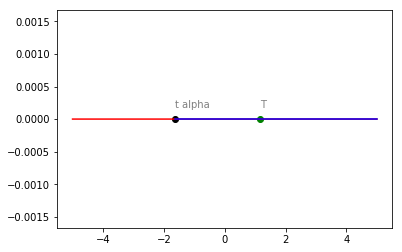

In [647]:
crit_conf_reg_plot(crit_stat = T_1, alpha=0.05, Ha_type='less')

##### Шаг 5а. Принимаем решение.

На уровне значимости 0,05 нулевая гипотеза принимается, т.к. статистика критерия попала в доверительную область.

##### Шаг 4б. Вычисляем p-value

In [648]:
p_value(T_1)

0.1251194122753233

p-value значительно больше уровня значимости. Принятому решению можно смело поверить.

### Задача 2. 

Для изучения эффективности лекарства против аллергии обследовались две группы людей, предрасположенных к этому заболеванию. Результаты обследования следующие: среди принимавших лекарство заболело 3 человека, не заболело 172 человека; среди не  принимавших заболело 32 человека, не заболело 168. Указывают ли эти результаты на эффективность лекарства?

##### Шаг 0. Строим модель.

p1 - вероятность не заболеть среди не принимавших препарат

p2 - вероятность не заболеть среди принимавших препарат

In [649]:
matrix_2 = get_AB_matrix(A_success=168, A_fail=32, B_success=172, B_fail=3)
matrix_2

array([[168.,  32., 200.],
       [172.,   3., 175.],
       [340.,  35., 375.]])

##### Шаг 1. Формулируем гипотезы.

H0: p1=p2
    
Ha: p1<p2

##### Шаг 2. Формулируем утверждение о статистике критерия.

Если гипотеза H0 верна, то Т~N(0,1)

##### Шаг 3. Вычисляем значение статистики критерия.

In [650]:
T_2 = get_T(matrix_2)
T_2

-4.744365458250511

##### Шаг 4а. Строим доверит. и крит. обл.

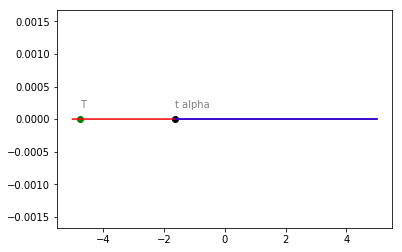

In [651]:
crit_conf_reg_plot(crit_stat = T_2, alpha=0.05, Ha_type='less')

##### Шаг 5а. Принимаем решение.

На уровне значимости 0,05 нулевая гипотеза отвергается в пользу альтернативной, т.к. статистика критерия попала в критическую область.

##### Шаг 4б. Вычисляем p-value

In [652]:
p_value(T_2)

0.9999989541953025

### Задача 3
Было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления:

для горожан: 130, 110, 120, 140, 200, 130, 140, 170, 160, 140;

для селян: 120, 190, 130, 160, 150, 120, 110, 120, 200.

Свидетельствуют ли эти данные в пользу того, что горожане имеют в среднем более высокое давление чем жители сельской местности?


##### Шаг 0. Строим модель.

"Иксы" (давление у горожан) 130, 110, 120, 140, 200, 130, 140, 170, 160, 140 ~ F(x)

"Игреки" (давление у селян) 120, 190, 130, 160, 150, 120, 110, 120, 200 ~ F(x+$\theta$)


##### Шаг 1. Формулируем гипотезы.

H0: $\theta$=0 (значимой разницы нет)
    
Ha: $\theta$>0 (разность среднего значения у горожан и селян - положительна)

##### Шаг 2. Формулируем утверждение о статистике критерия.

Если гипотеза H0 верна, то $\bar{W}$~N(0,1)

##### Шаг 3. Вычисляем значение статистики критерия.

In [653]:
X_3 = np.array([[130, 110, 120, 140, 200, 130, 140, 170, 160, 140]])
Y_3 = np.array([[120, 190, 130, 160, 150, 120, 110, 120, 200]])
array_3 = initial_arr(X_3,Y_3)
array_3

array([[110.,   0.],
       [110.,   1.],
       [120.,   0.],
       [120.,   1.],
       [120.,   1.],
       [120.,   1.],
       [130.,   0.],
       [130.,   0.],
       [130.,   1.],
       [140.,   0.],
       [140.,   0.],
       [140.,   0.],
       [150.,   1.],
       [160.,   0.],
       [160.,   1.],
       [170.,   0.],
       [190.,   1.],
       [200.,   0.],
       [200.,   1.]])

In [654]:
array_3 = rang_maker(array_3)
array_3

array([[110. ,   0. ,   1.5],
       [110. ,   1. ,   1.5],
       [120. ,   0. ,   4.5],
       [120. ,   1. ,   4.5],
       [120. ,   1. ,   4.5],
       [120. ,   1. ,   4.5],
       [130. ,   0. ,   8. ],
       [130. ,   0. ,   8. ],
       [130. ,   1. ,   8. ],
       [140. ,   0. ,  11. ],
       [140. ,   0. ,  11. ],
       [140. ,   0. ,  11. ],
       [150. ,   1. ,  13. ],
       [160. ,   0. ,  14.5],
       [160. ,   1. ,  14.5],
       [170. ,   0. ,  16. ],
       [190. ,   1. ,  17. ],
       [200. ,   0. ,  18.5],
       [200. ,   1. ,  18.5]])

In [655]:
W_3 = results(array_3)[0]
W_3

-0.32659863237109044

In [656]:
print ('Статистика критерия: {0:.3}'.format(results(array_3)[0]))
print ('Мат. ожидание (давление у селян): {0}'.format(results(array_3)[1]))
print ('Дисперсия (давление у селян): {0}'.format(results(array_3)[2]))
print ('Суммма рангов (давление у селян): {0}'.format(results(array_3)[3]))

Статистика критерия: -0.327
Мат. ожидание (давление у селян): 90.0
Дисперсия (давление у селян): 150.0
Суммма рангов (давление у селян): 86.0


##### Шаг 4а. Строим доверит. и крит. обл.

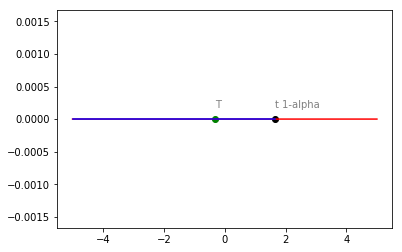

In [657]:
crit_conf_reg_plot(crit_stat = W_3, alpha=0.05, Ha_type='bigger')

##### Шаг 5а. Принимаем решение.

На уровне значимости 0,05 нулевая гипотеза принимается, т.к. статистика критерия попала в доверительную область.

##### Шаг 4б. Вычисляем p-value

In [658]:
p_value(W_3)

0.6280142609624715

p-value значительно больше уровня значимости. Принятому решению можно смело поверить.

### Задача 4

Уровень гистамина в мокроте у 7 курильщиков, склонных к аллергии, составил в мг:

102,4	100,0	67,6	65,9	64,7	39,6	31,2

У 10 курильщиков не склонных к аллергии составил в мг:

48,1	45,5	41,7	35,4	29,1	18,9	58,3	68,8	71,3	94,3

Можно ли, основываясь на этих данных, считать с надёжностью 0,95 что уровень гистамина у склонных и не склонных к аллергии курильщиков значимо различается?

##### Шаг 0. Строим модель.

"Иксы" (Уровень гистамина у склонных к аллергии курильщиков) 102.4, 100.0, 67.6, 65.9, 64.7, 39.6, 31.2 ~ F(x)

"Игреки" (Уровень гистамина у не склонных к аллергии курильщиков) 48.1, 45.5, 41.7, 35.4, 
29.1, 18.9, 58.3, 68.8, 71.3, 94.3 ~ F(x+$\theta$)

##### Шаг 1. Формулируем гипотезы.

H0: $\theta$=0 (значимой разницы нет)
    
Ha: $\theta$>0 (разность среднего значения у склонных и не склонных - положительна)

##### Шаг 2. Формулируем утверждение о статистике критерия.

Если гипотеза H0 верна, то $\bar{W}$~N(0,1)

##### Шаг 3. Вычисляем значение статистики критерия.

In [659]:
X_4 = np.array([[102.4, 100.0, 67.6, 65.9, 64.7, 39.6, 31.2]])
Y_4 = np.array([[48.1, 45.5, 41.7, 35.4, 29.1, 18.9, 58.3, 68.8, 71.3, 94.3]])
array_4 = initial_arr(X_4,Y_4)
array_4

array([[ 18.9,   1. ],
       [ 29.1,   1. ],
       [ 31.2,   0. ],
       [ 35.4,   1. ],
       [ 39.6,   0. ],
       [ 41.7,   1. ],
       [ 45.5,   1. ],
       [ 48.1,   1. ],
       [ 58.3,   1. ],
       [ 64.7,   0. ],
       [ 65.9,   0. ],
       [ 67.6,   0. ],
       [ 68.8,   1. ],
       [ 71.3,   1. ],
       [ 94.3,   1. ],
       [100. ,   0. ],
       [102.4,   0. ]])

In [660]:
array_4 = rang_maker(array_4)
array_4

array([[ 18.9,   1. ,   1. ],
       [ 29.1,   1. ,   2. ],
       [ 31.2,   0. ,   3. ],
       [ 35.4,   1. ,   4. ],
       [ 39.6,   0. ,   5. ],
       [ 41.7,   1. ,   6. ],
       [ 45.5,   1. ,   7. ],
       [ 48.1,   1. ,   8. ],
       [ 58.3,   1. ,   9. ],
       [ 64.7,   0. ,  10. ],
       [ 65.9,   0. ,  11. ],
       [ 67.6,   0. ,  12. ],
       [ 68.8,   1. ,  13. ],
       [ 71.3,   1. ,  14. ],
       [ 94.3,   1. ,  15. ],
       [100. ,   0. ,  16. ],
       [102.4,   0. ,  17. ]])

In [661]:
W_4 = results(array_4)[0]
W_4

-1.0734900802433864

In [662]:
print ('Статистика критерия: {0:.3}'.format(results(array_4)[0]))
print ('Мат. ожидание (давление у селян): {0}'.format(results(array_4)[1]))
print ('Дисперсия (давление у селян): {0}'.format(results(array_4)[2]))
print ('Суммма рангов (давление у селян): {0}'.format(results(array_4)[3]))

Статистика критерия: -1.07
Мат. ожидание (давление у селян): 90.0
Дисперсия (давление у селян): 105.0
Суммма рангов (давление у селян): 79.0


##### Шаг 4а. Строим доверит. и крит. обл.

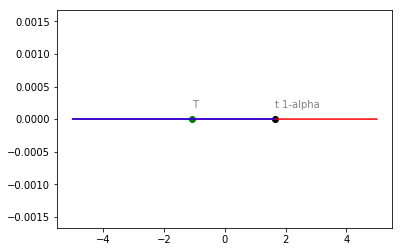

In [663]:
crit_conf_reg_plot(crit_stat = W_4, alpha=0.05, Ha_type='bigger')

##### Шаг 5а. Принимаем решение.

На уровне значимости 0,05 нулевая гипотеза принимается, т.к. статистика критерия попала в доверительную область.

##### Шаг 4б. Вычисляем p-value

In [664]:
p_value(W_4)

0.8584743564740577

p-value значительно больше уровня значимости. Принятому решению можно смело поверить.